In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

from collections import Counter

## Ensemble Results Exploration

In [4]:
data_path = 'ensemble_cache/ensemble_results.csv'

In [5]:
df = pd.read_csv(data_path)

In [6]:
df.head()

,id,taxonomic_level,joint_prediction,image_prediction,meta_prediction,true_label
0,4126.0,taxon_family_name,Elephantidae,Elephantidae,Felidae,Elephantidae
1,4126.0,taxon_genus_name,Loxodonta,Loxodonta,Loxodonta,Loxodonta
2,4126.0,taxon_species_name,Loxodonta africana,Loxodonta africana,Loxodonta africana,Loxodonta africana
3,16346.0,taxon_family_name,Elephantidae,Elephantidae,Felidae,Elephantidae
4,16346.0,taxon_genus_name,Loxodonta,Loxodonta,Loxodonta,Loxodonta


### Calculate the number of Miss-classifications
The ensemble method stops decreasing the taxonomic level prediction when a miss-classification occurs. 
Therefore the number of miss-classifications downs to the sub-species level can be calculated as follows.

In [15]:
error_count = len(df[df['joint_prediction'] != df['true_label']])

In [16]:
print(error_count)

723


Determine the number of unique observations within the predictions to determine the size of the dataset.

In [17]:
dataset_size = df['id'].nunique()
print(dataset_size)

4047


Calculate the error percentage

In [18]:
error_percent = error_count / dataset_size

In [19]:
print(error_percent)

0.17865085248332097


The ensemble method produces a total of 0.13 miss-classification rate. 
Hence the accuracy of the ensemble method is approximately 0.87

In [20]:
print(1 - error_percent)

0.821349147516679


### Calculate Miss-classifications to the Subspecies level

In [21]:
df_species = df[df['taxonomic_level'] != 'sub_species']

In [22]:
error_count = len(df_species[df_species['joint_prediction'] != df_species['true_label']])

In [23]:
dataset_size = df_species['id'].nunique()
print(dataset_size)

4047


In [25]:
error_percent = error_count / dataset_size
print(error_percent)

0.15517667407956512


In [26]:
print(1 - error_percent)

0.8448233259204349


### Taxonomic Reports
Generate both the classification report and the accuracy report per taxonomic level. 

#### Family

In [11]:
df_family = df[df['taxonomic_level'] == 'taxon_family_name']

In [12]:
report_family = classification_report(df_family['joint_prediction'], df_family['true_label'])

In [13]:
print(report_family)

              precision    recall  f1-score   support

Elephantidae       0.99      0.98      0.98      1372
     Felidae       0.99      0.99      0.99      2602

    accuracy                           0.99      3974
   macro avg       0.99      0.99      0.99      3974
weighted avg       0.99      0.99      0.99      3974



In [14]:
accuracy_family = balanced_accuracy_score(df_family['joint_prediction'], df_family['true_label'])

In [15]:
print(accuracy_family)

0.9876423831858427


#### Genus

In [16]:
df_genus = df[df['taxonomic_level'] == 'taxon_genus_name']

In [17]:
report_genus = classification_report(df_genus['joint_prediction'], df_genus['true_label'], zero_division=1)

In [18]:
print(report_genus)

              precision    recall  f1-score   support

    Acinonyx       0.88      0.91      0.90       114
     Caracal       0.79      0.39      0.52        70
    Catopuma       0.00      1.00      0.00         0
     Elephas       0.97      0.82      0.89       221
       Felis       0.65      0.60      0.62        62
 Herpailurus       0.86      0.40      0.54        78
   Leopardus       0.63      0.72      0.67       125
 Leptailurus       0.87      0.36      0.51        55
   Loxodonta       0.97      0.99      0.98      1125
        Lynx       0.81      0.98      0.89      1042
    Neofelis       1.00      0.00      0.00         4
  Otocolobus       1.00      0.14      0.25        14
    Panthera       0.89      0.96      0.93       617
  Pardofelis       0.00      0.00      0.00         1
Prionailurus       0.73      0.22      0.34        36
        Puma       0.93      0.61      0.74       369

    accuracy                           0.88      3933
   macro avg       0.75   

In [19]:
accuracy_genus = balanced_accuracy_score(df_genus['joint_prediction'], df_genus['true_label'])

/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [20]:
print(accuracy_genus)

0.5403418400529428


#### Species

In [21]:
df_species = df[df['taxonomic_level'] == 'taxon_species_name']

In [22]:
report_species = classification_report(df_species['joint_prediction'], df_species['true_label'], zero_division=1)

In [23]:
print(report_species)

                          precision    recall  f1-score   support

         Caracal caracal       1.00      1.00      1.00        27
             Felis chaus       0.90      1.00      0.95         9
            Felis lybica       0.94      0.94      0.94        16
          Felis nigripes       1.00      0.00      0.00         1
        Felis silvestris       1.00      1.00      1.00        11
     Leopardus geoffroyi       0.75      1.00      0.86         6
        Leopardus guigna       1.00      0.00      0.00         2
      Leopardus guttulus       1.00      0.00      0.00         1
      Leopardus pardalis       0.85      0.92      0.88        65
      Leopardus tigrinus       0.67      0.50      0.57         4
        Leopardus wiedii       0.38      0.25      0.30        12
      Loxodonta africana       1.00      1.00      1.00      1104
      Loxodonta cyclotis       0.88      1.00      0.94        15
         Lynx canadensis       0.91      0.38      0.54        84
         

In [24]:
accuracy_species = balanced_accuracy_score(df_species['joint_prediction'], df_species['true_label'])

In [25]:
print(accuracy_species)

0.7650394794838605


#### Sub-species

In [26]:
df_subspecies = df[df['taxonomic_level'] == 'sub_species']
report_subspecies = classification_report(df_subspecies['joint_prediction'], df_subspecies['true_label'], zero_division=1)

In [27]:
print(report_subspecies)

                                      precision    recall  f1-score   support

              Acinonyx jubatus hecki       1.00      1.00      1.00         2
            Acinonyx jubatus jubatus       1.00      1.00      1.00        93
          Elephas maximus borneensis       1.00      1.00      1.00        13
             Elephas maximus indicus       0.99      0.99      0.99        83
             Elephas maximus maximus       1.00      1.00      1.00        60
          Elephas maximus sumatranus       0.67      0.67      0.67         3
                  Felis lybica cafra       1.00      1.00      1.00         8
                 Felis lybica lybica       1.00      1.00      1.00         2
         Felis silvestris silvestris       1.00      1.00      1.00         3
         Leopardus pardalis pardalis       1.00      1.00      1.00         3
      Leptailurus serval constantina       1.00      1.00      1.00         2
      Leptailurus serval lipostictus       1.00      1.00      

In [28]:
accuracy_subspecies = balanced_accuracy_score(df_subspecies['joint_prediction'], df_subspecies['true_label'])

/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [29]:
print(accuracy_subspecies)

0.9424703942705807


## Global Model Comparison

In [27]:
global_path = 'ensemble_cache_2/global_model_accuracies.csv'
global_df = pd.read_csv(global_path)

In [28]:
global_df.head()

,model_purpose,accuracy,taxon_level
0,Meta classification,0.322979,Species
1,Image classification,0.046501,Species
2,Cascading ensemble classification,0.844823,Species


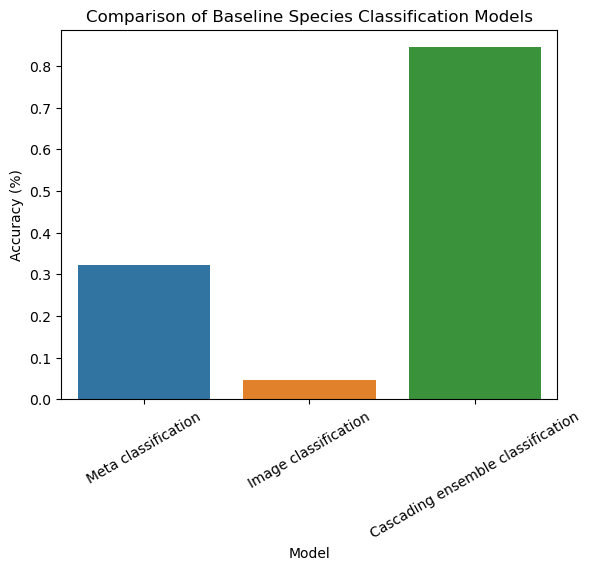

In [29]:
sns.barplot(data=global_df, x='model_purpose', y='accuracy')

plt.title('Comparison of Baseline Species Classification Models')
plt.xticks(rotation=30)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()

#### Accuracies down the taxonomic hierarchy

In [36]:
df_accuracy = accuracy_collection(df)

/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/travisdawson/anaconda3/envs/spatiotemp_class_env/lib/python3.1

In [37]:
df_accuracy['taxonomic_level'] = df_accuracy['taxonomic_level'].replace({'taxon_family_name': 'Family', 'taxon_genus_name': 'Genus', 'taxon_species_name': 'Species', 'sub_species': 'Subspecies'})

In [38]:
df_accuracy.head()

,taxonomic_level,accuracy,method
0,Family,0.987642,joint-classification
1,Family,0.978630,image-classification
2,Family,0.809386,meta-classification
3,Genus,0.540342,joint-classification
4,Genus,0.463463,image-classification


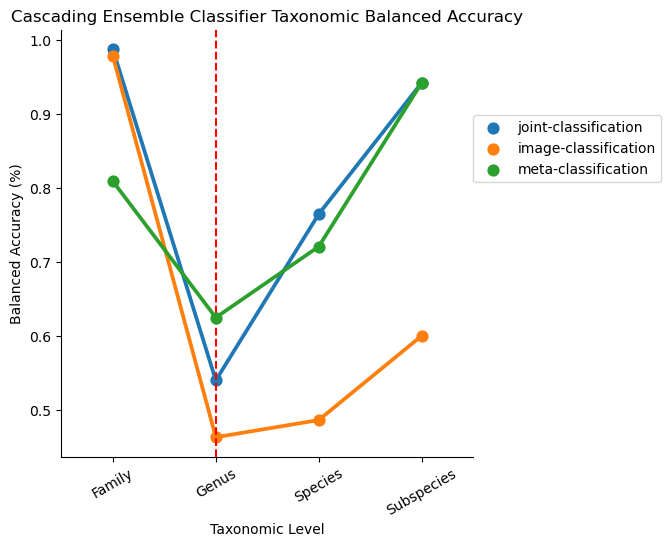

In [40]:
g = sns.catplot(data=df_accuracy, x='taxonomic_level', y='accuracy', hue='method', kind='point')
g.refline(x=1, color='red')
g._legend.remove()
g.set(xlabel=None)
g.set(ylabel=None)

plt.xticks(rotation=30)
plt.title('Cascading Ensemble Classifier Taxonomic Balanced Accuracy')
plt.xlabel('Taxonomic Level')
plt.ylabel('Balanced Accuracy (%)')
plt.legend(bbox_to_anchor=(1.0, 0.8), loc='upper left', borderaxespad=0)
plt.show()

In [35]:
def accuracy_collection(df: pd.DataFrame):
    df_accuracy = pd.DataFrame()
    levels = ['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species']
    for level in levels:
        df_level = df[df['taxonomic_level'] == level]  # Assign taxonomic level search
        testing = df[df['image_prediction'] != df['true_label']]
        
        joint_accuracy = balanced_accuracy_score(df_level['joint_prediction'], df_level['true_label'])  # Generate joint accuracy
        image_accuracy = balanced_accuracy_score(df_level['image_prediction'], df_level['true_label'])  # Generate image accuracy
        meta_accuracy = balanced_accuracy_score(df_level['meta_prediction'], df_level['true_label'])  # Generate meta accuracy
        
        row = pd.DataFrame([{'taxonomic_level': level, 'accuracy': joint_accuracy, 'method': 'joint-classification'},
                           {'taxonomic_level': level, 'accuracy': image_accuracy, 'method': 'image-classification'},
                           {'taxonomic_level': level, 'accuracy': meta_accuracy, 'method': 'meta-classification'}])  # Generate row dataframe
        df_accuracy = pd.concat([df_accuracy, row], ignore_index=True)  # Add new row to existing dataframe
    return df_accuracy

### Taxonomic Level Individual Perspective
Showcase the difference between the ensemble method predictions at each taxonomic level and the image classification level. 

In [42]:
differences = individual_difference(df).reset_index()

In [43]:
differences.head()

,index,precision,recall,f1-score,support,level
0,Elephantidae,0.000735,0.017583,0.009300,-24.0,Family
1,Felidae,0.009568,0.000442,0.005045,24.0,Family
2,Acinonyx,-0.016949,0.036248,0.009522,-7.0,Genus
3,Caracal,0.000000,0.146776,0.151884,-43.0,Genus
4,Elephas,0.026738,0.109327,0.078059,-27.0,Genus


#### Overall

In [44]:
differences_mean = differences.groupby('level').agg({'precision': 'mean', 'recall': 'mean', 'f1-score': 'mean'})

In [45]:
differences_mean.head()

,precision,recall,f1-score
level,,,
Family,0.005151,0.009012,0.007172
Genus,0.040520,0.076878,0.089315
Species,0.210229,0.208854,0.236494
Subspecies,0.334029,0.316607,0.363565


In [46]:
differences_mean = differences_mean.reindex(['Family', 'Genus', 'Species', 'Subspecies'])

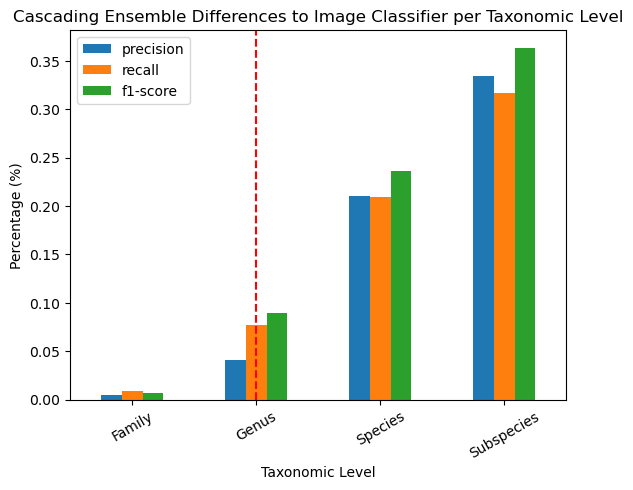

In [48]:
differences_mean.plot(kind='bar')
plt.axvline(1, color='r', linestyle='--')
plt.xticks(rotation=30)

plt.title('Cascading Ensemble Differences to Image Classifier per Taxonomic Level')
plt.ylabel('Percentage (%)')
plt.xlabel('Taxonomic Level')
plt.show()

#### Family

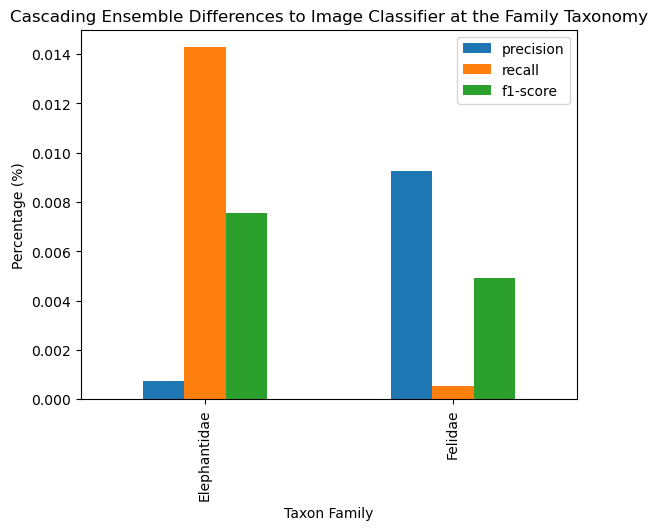

In [47]:
family_diff = differences[differences['level'] == 'Family']

family_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.title('Cascading Ensemble Differences to Image Classifier at the Family Taxonomy')
plt.xlabel('Taxon Family')
plt.ylabel('Percentage (%)')
plt.show()

#### Genus

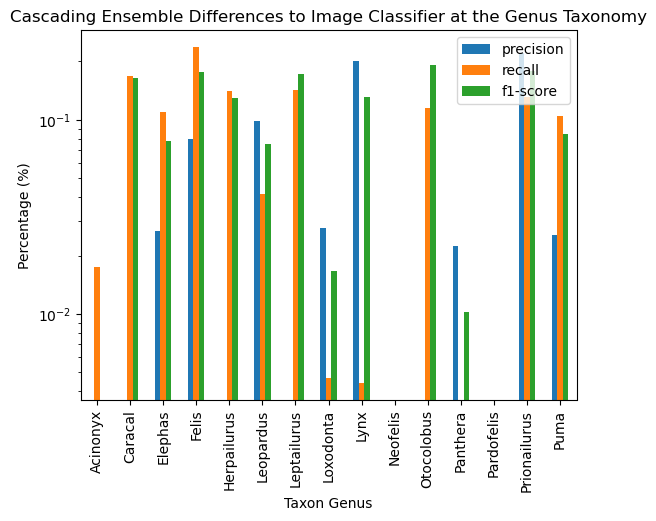

In [48]:
genus_diff = differences[differences['level'] == 'Genus']

genus_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.title('Cascading Ensemble Differences to Image Classifier at the Genus Taxonomy')
plt.xlabel('Taxon Genus')
plt.ylabel('Percentage (%)')
plt.yscale('log')
plt.show()

#### Species

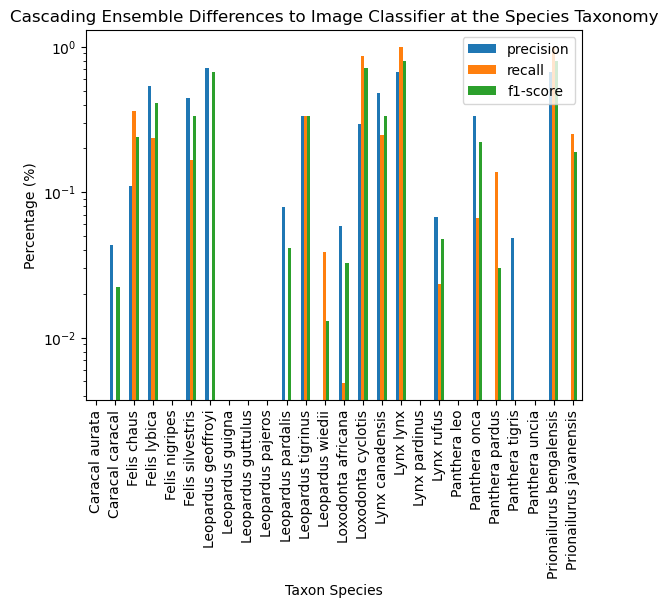

In [49]:
species_diff = differences[differences['level'] == 'Species']

species_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.title('Cascading Ensemble Differences to Image Classifier at the Species Taxonomy')
plt.xlabel('Taxon Species')
plt.ylabel('Percentage (%)')
plt.show()

#### Sub-species

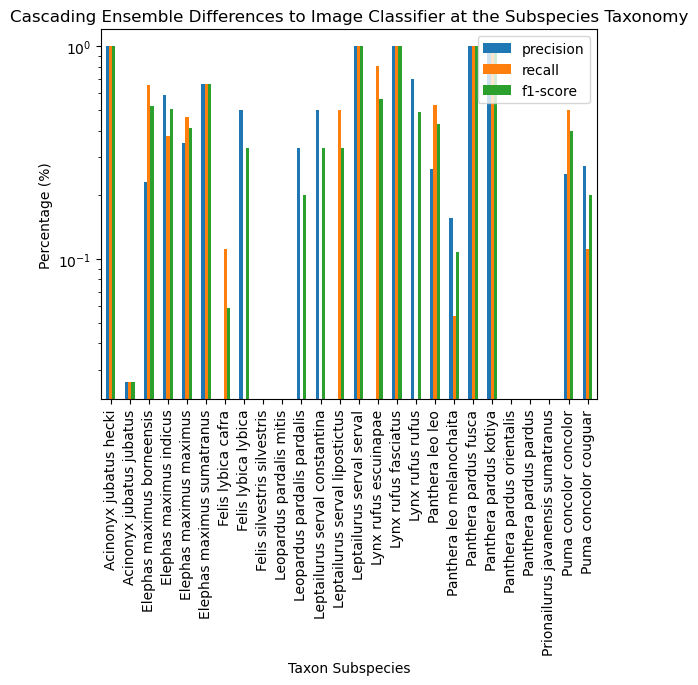

In [50]:
subspecies_diff = differences[differences['level'] == 'Subspecies']

subspecies_diff.plot(kind='bar',
                x='index',
                y=['precision', 'recall', 'f1-score'])

plt.yscale('log')
plt.title('Cascading Ensemble Differences to Image Classifier at the Subspecies Taxonomy')
plt.xlabel('Taxon Subspecies')
plt.ylabel('Percentage (%)')
plt.show()

In [41]:
convert_dict = {'taxon_family_name': 'Family', 'taxon_genus_name': 'Genus', 'taxon_species_name': 'Species', 'sub_species': 'Subspecies'}

def individual_difference(df: pd.DataFrame):
    df_individual = pd.DataFrame()
    levels = ['taxon_family_name', 'taxon_genus_name', 'taxon_species_name', 'sub_species']
    for level in levels:
        df_level = df[df['taxonomic_level'] == level]  # Assign taxonomic level search
        
        joint_accuracy = classification_report(df_level['joint_prediction'], df_level['true_label'], output_dict=True, zero_division=0)  # Generate joint accuracy
        image_accuracy = classification_report(df_level['image_prediction'], df_level['true_label'], output_dict=True, zero_division=0)  # Generate image accuracy
    
        df_joint = pd.DataFrame(joint_accuracy).T
        df_image = pd.DataFrame(image_accuracy).T
        
        
        df_joint = df_joint[df_joint['support'] != 0]  # Remove classes with no observations in test set
        df_image = df_image[df_image['support'] != 0]
        
        
        df_joint.drop(df_joint.tail(3).index, inplace = True)
        df_image.drop(df_image.tail(3).index, inplace = True)
        
        difference = df_joint.subtract(df_image, axis=0, fill_value=0)
        difference['level'] = convert_dict[level]
        df_individual = pd.concat([df_individual, difference])
    return df_individual
        
        